# Loading packages & Data

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(f"numpy: {np.__version__}, pandas: {pd.__version__}")

numpy: 1.23.4, pandas: 1.5.1


###### importing as .arff file with spicy.io

In [75]:
# dataset = spicy.io.arff.loadarff(open('../Dataset Chronic Kidney Disease/chronic_kidney_disease.arff'))
# type(dataset)

##### create csv from arff file and import data:

In [76]:
def csv_from_arff(file_name):
    with open(file_name + '.arff', 'r') as fin:
        data = fin.read().splitlines(True)
    i = 0
    cols = []
    for line in data:
        line = line.lower()
        if '@data' in line:
            i+= 1
            break
        else:
            #print line
            i+= 1
            if line.startswith('@attribute'):
                if'{' in line:
                    cols.append(line[11:line.index('{')-1])
                else:
                    cols.append(line[11:line.index(' ', 11)])
    headers = ",".join(cols)
    with open(file_name + '.csv', 'w') as foo:
        foo.write(headers)
        foo.write('\n')
        foo.writelines(data[i:])

# csv_from_arff('../Dataset Chronic Kidney Disease/chronic_kidney_disease')

In [77]:
dataset = pd.read_csv("../Dataset Chronic Kidney Disease/chronic_kidney_disease.csv")

In [78]:
dataset.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400,400,400,400,400,400,400,400,400,400,...,400,400,400,400,400,400,400,400,400,400
unique,77,11,6,7,7,3,3,3,3,147,...,44,93,50,3,6,3,3,3,3,2
top,60,80,1.020,0,0,normal,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,no,ckd
freq,19,116,106,199,290,201,259,354,374,44,...,71,105,130,251,259,364,317,323,339,250


#### fix dataset empty cells, rows and columns plus fixing data types.

In [79]:
dataset.replace('?', np.nan, inplace=True)
dataset.replace('\t?', np.nan, inplace=True)
dataset.drop(400, axis=0, inplace=True)

In [80]:
for col in dataset.columns.values:
    dataset[col] = pd.Series(dataset[col], dtype='float')
dataset.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

In [81]:
# Missing% data:
dataset.isna().sum() / 4

age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wbcc     26.50
rbcc     32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
class     0.00
dtype: float64

#### Fill NaN with median in numeric columns & categorical values with values distribution

In [82]:
a = dataset.select_dtypes("float64")
b = dataset.select_dtypes("object")

In [83]:
cat = ['sg', 'al', 'su', 'bp']

num_cols = dataset.select_dtypes("float64")
num_cols.drop(cat, axis=1, inplace=True)
num_cols.head()

,age,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
0,48.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [84]:
cat_cols = dataset.drop(num_cols.columns.values, axis=1)
cat_cols.head()

,bp,sg,al,su,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [85]:
def median_mode_mean(df, column):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex='all', gridspec_kw= {"height_ratios": (0.2, 1)})
    mean=df[column].mean()
    median=df[column].median()
    mode=df[column].mode().values[0]

    sns.boxplot(data=df, x=column, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    ax_box.axvline(mode, color='b', linestyle='-')

    sns.histplot(data=df, x=column, ax=ax_hist, kde=True)
    ax_hist.axvline(mean, color='r', linestyle='--', label=f"Mean: {mean:.2f}")
    ax_hist.axvline(median, color='g', linestyle='-', label=f"Median: {median:.2f}")
    ax_hist.axvline(mode, color='b', linestyle='-', label=f"Mode: {mode:.2f}")

    ax_hist.legend()

    ax_box.set(xlabel='')
    plt.show()

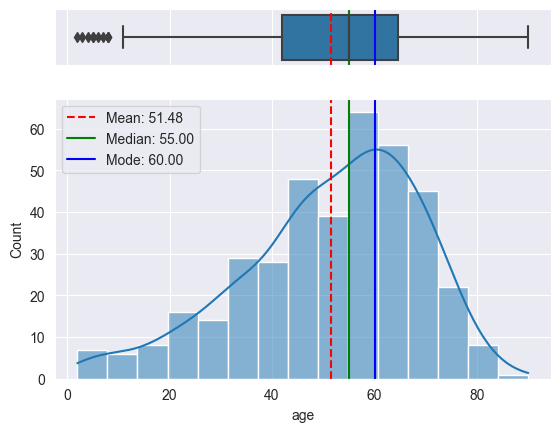

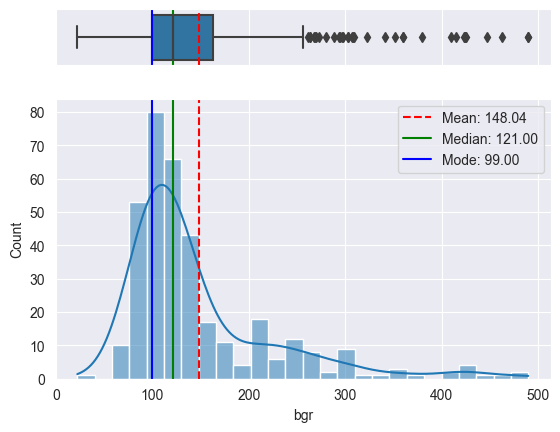

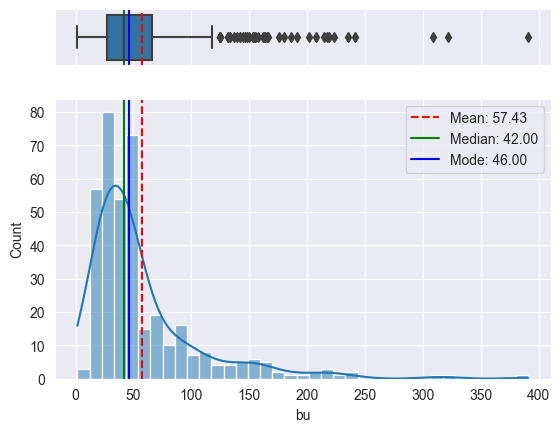

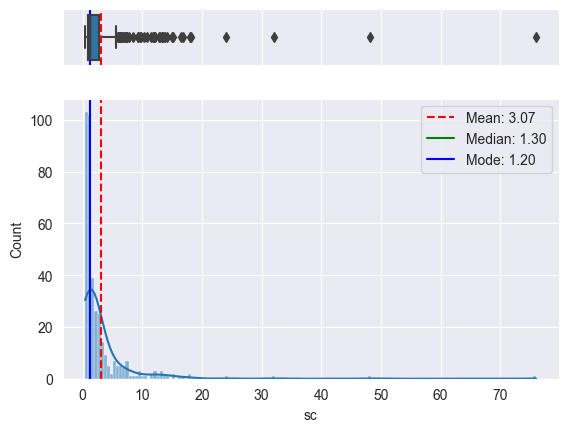

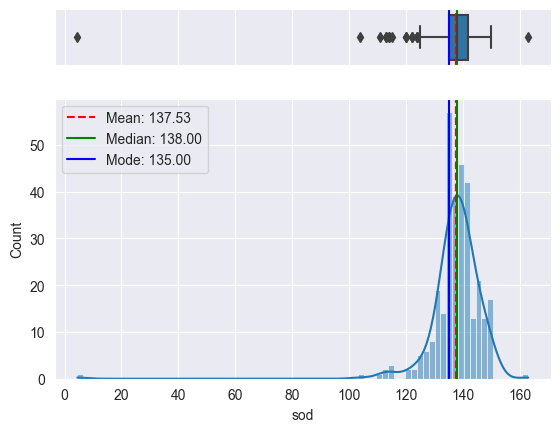

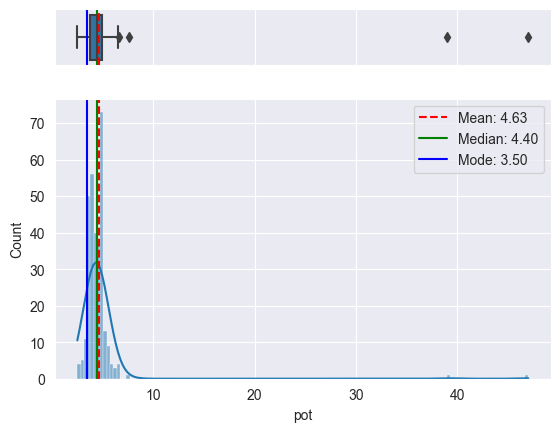

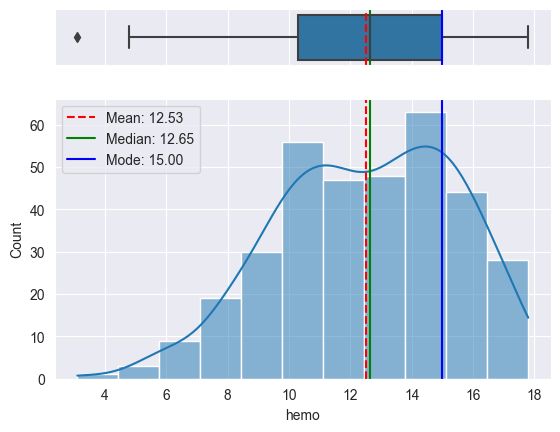

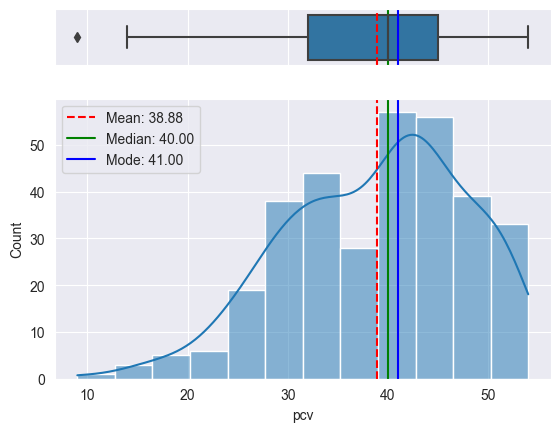

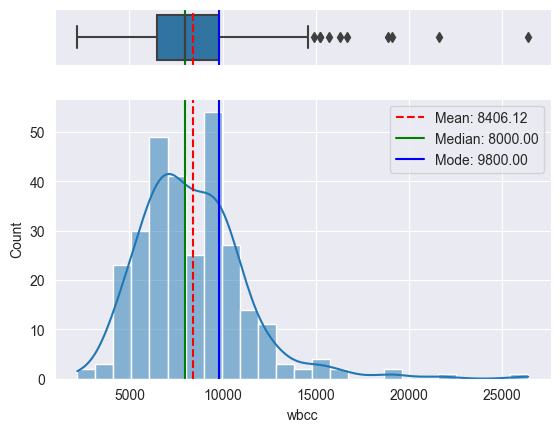

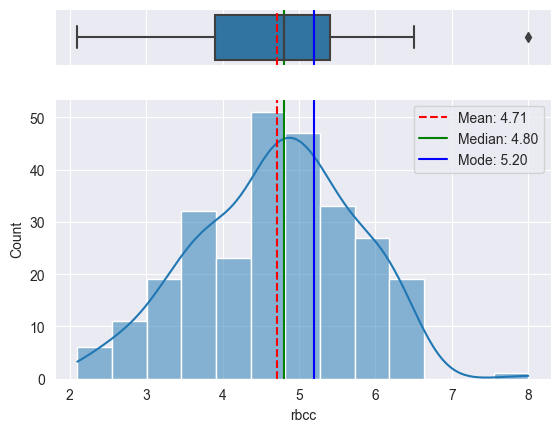

In [86]:
for c in num_cols.columns.values:
    median_mode_mean(dataset, c)

In [87]:
cleanset = dataset.copy()

In [88]:
for col in num_cols.columns.values:
    missing = cleanset[col].isna()
    cleanset.loc[missing,col] = cleanset[col].median()

In [89]:
for col in cat_cols:
    distribution_of_values = cleanset[col].value_counts(normalize=True)
    missing = cleanset[col].isna()
    cleanset.loc[missing,col] = np.random.choice(distribution_of_values.index, size=len(cleanset[missing]),p=distribution_of_values.values)

In [90]:
cleanset.isna().sum() / 4

age      0.0
bp       0.0
sg       0.0
al       0.0
su       0.0
rbc      0.0
pc       0.0
pcc      0.0
ba       0.0
bgr      0.0
bu       0.0
sc       0.0
sod      0.0
pot      0.0
hemo     0.0
pcv      0.0
wbcc     0.0
rbcc     0.0
htn      0.0
dm       0.0
cad      0.0
appet    0.0
pe       0.0
ane      0.0
class    0.0
dtype: float64

In [91]:
cleanset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,abnormal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


#### Scaling of Numeric Columns

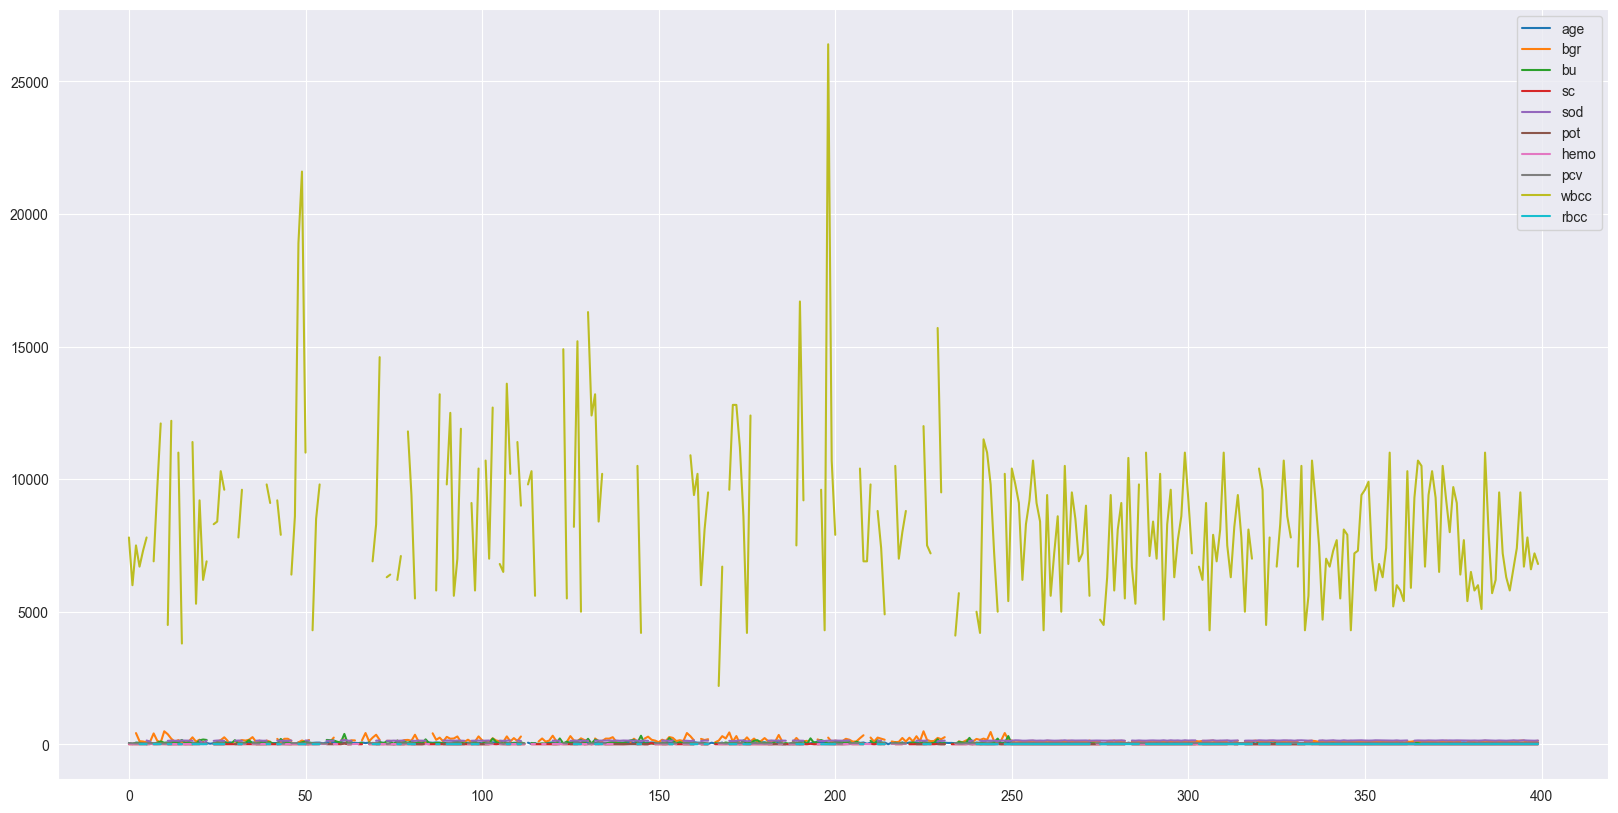

In [92]:
plt.figure(figsize=(20,10))
plt.plot(num_cols)
plt.legend(num_cols.columns)
plt.grid(True)
plt.show()

In [93]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()

num_cols_sc = rs.fit_transform(num_cols)
num_cols = pd.DataFrame(num_cols_sc, columns=num_cols.columns)

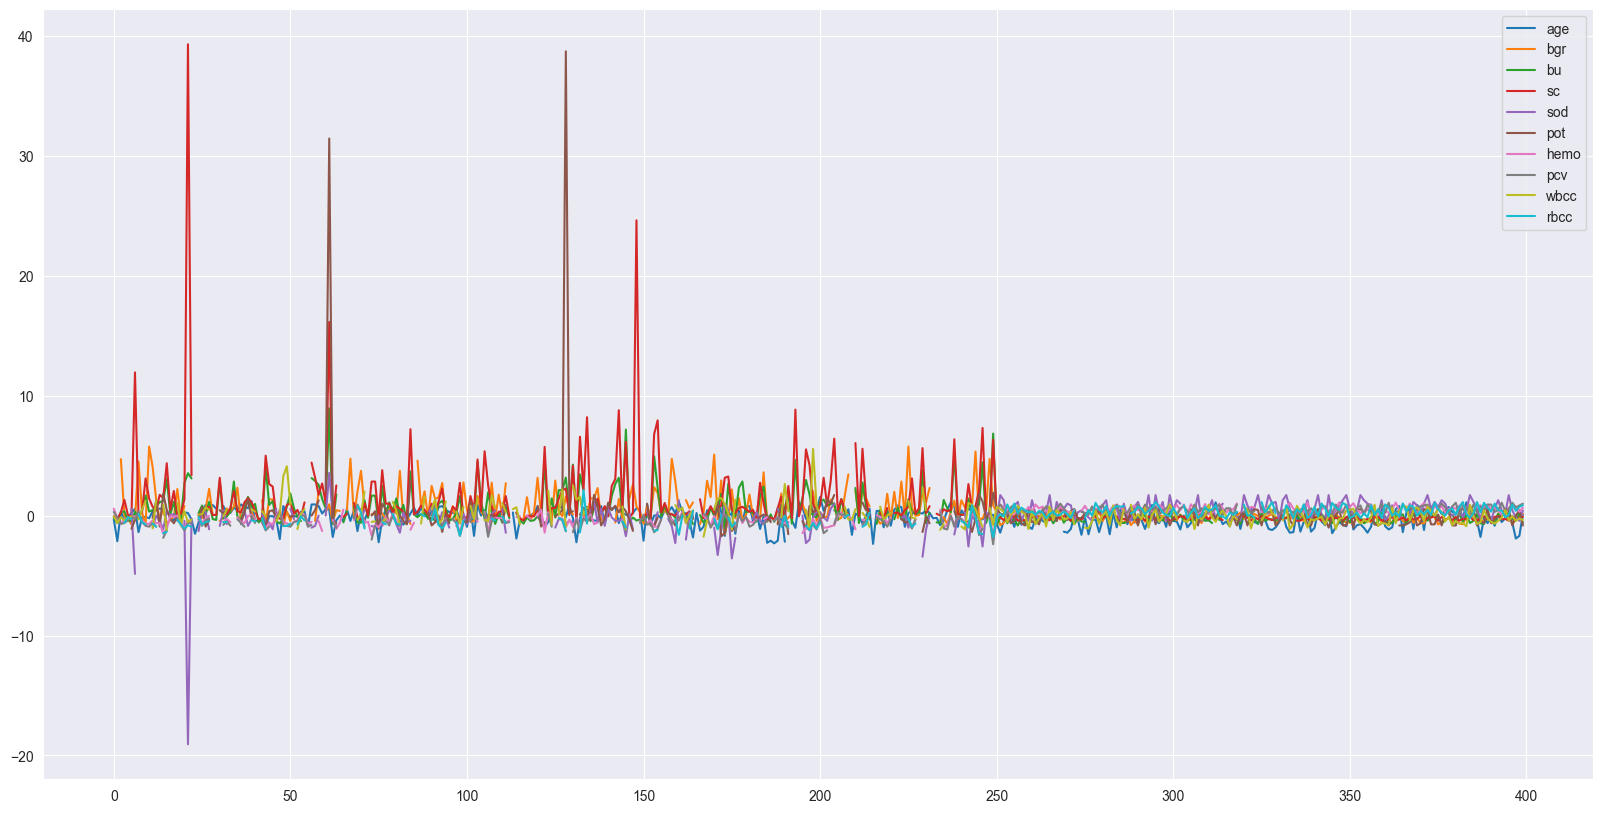

In [94]:
plt.figure(figsize=(20,10))
plt.plot(num_cols)
plt.legend(num_cols.columns)
plt.grid(True)
plt.show()

# Encode objects with label encoder:

In [95]:
encoded_set = cleanset.copy()

In [96]:
from sklearn.preprocessing import OrdinalEncoder
encoded_set[cat_cols.columns.values] = OrdinalEncoder(dtype=np.int8).fit_transform(encoded_set[cat_cols.columns.values])

In [97]:
encoded_set.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,3,3,1,0,0,1,0,0,121.0,...,44.0,7800.0,5.2,1,4,0,0,0,0,0
1,7.0,0,3,4,0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,3,0,0,0,0,0
2,62.0,3,1,2,3,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,4,0,1,0,1,0
3,48.0,2,0,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,3,0,1,1,1,0
4,51.0,3,1,2,0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,3,0,0,0,0,0


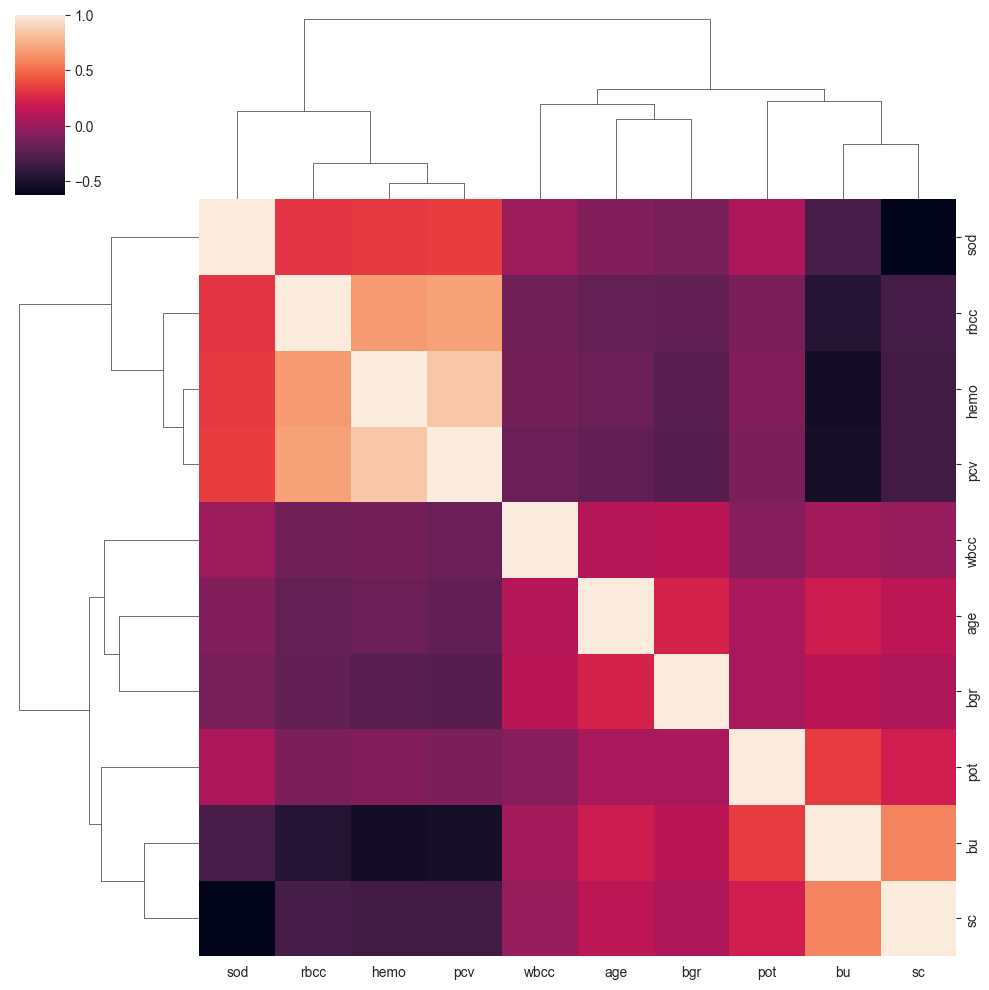

In [98]:
import seaborn as sns

sns.clustermap(encoded_set[num_cols.columns.values].corr(), colors_ratio=0.01)

In [99]:
cor_matrix = encoded_set[cat_cols.columns.values].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.75)]
to_drop

[]

###### Extract Data `X` and Target `y` from our Dataset.
##### Devide to train and test segments:

In [100]:
from sklearn.model_selection import train_test_split
X = encoded_set.drop(['class'], axis=1)
y = encoded_set['class']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=0)

# DecisionTree classification

###### early test and score

In [101]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, criterion='gini')
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.9666666666666667

##### Decision Tree Report

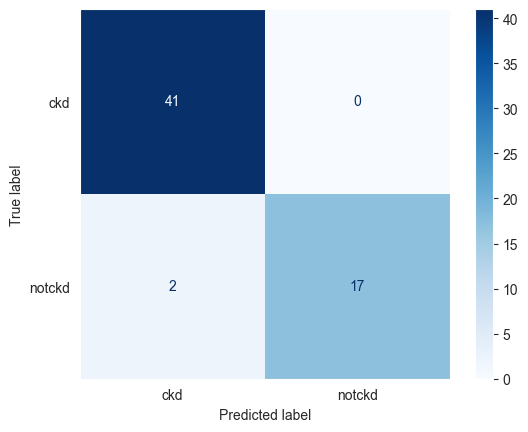

In [102]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(dt,X_test, y_test, display_labels=['ckd','notckd'], cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [103]:
from sklearn.metrics import classification_report

y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.89      0.94        19

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60



In [104]:
for var, imp in zip(X.columns.values, dt.feature_importances_):
    if imp != 0:
        print(f'{var}: {imp}')

sg: 0.17095014428737357
al: 0.016163471366364108
bgr: 0.014901932137769821
bu: 0.02891513023102323
sc: 0.0008877614254315414
sod: 0.009934621425179879
hemo: 0.7323672022369364
pcv: 0.002288325318353088
rbcc: 0.015312560383918426
htn: 0.008278851187649901


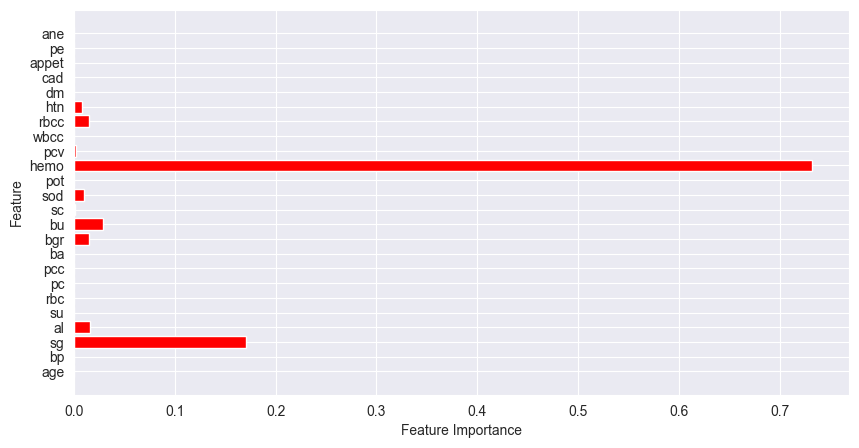

In [105]:
def features_importance_plot(model):
    plt.figure(figsize=(10,5))
    plt.barh(range(len(X.columns.values)), model.feature_importances_, align='center', color='red')
    plt.yticks(np.arange(len(X.columns.values)), X.columns.values)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.grid(True)
features_importance_plot(dt)
plt.show()

##### Grid Search

In [106]:
dt_params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [107]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
dt_grid_search = GridSearchCV(estimator=dt,
                           param_grid=dt_params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
dt_grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(dt_grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

Fitting 4 folds for each of 50 candidates, totalling 200 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
10,0.006249,0.002278,0.002251,0.000432,gini,5,5,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.988235,0.976471,0.964706,0.964706,0.973529,0.009755,1
15,0.004251,0.000432,0.002999,0.000706,gini,10,5,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.988235,0.976471,0.964706,0.964706,0.973529,0.009755,1
20,0.004002,0.000004,0.006250,0.007367,gini,20,5,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.988235,0.976471,0.964706,0.964706,0.973529,0.009755,1
0,0.004748,0.000434,0.002501,0.000501,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.988235,0.952941,0.964706,0.964706,0.967647,0.012820,4
5,0.003749,0.000433,0.001749,0.000433,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.988235,0.952941,0.964706,0.964706,0.967647,0.012820,4


In [108]:
dt_best = dt_grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0)

In [109]:
from sklearn import tree


def get_dt_graph(dt_classifier):
    __ = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['cdk', "no cdk"],
                       filled=True)

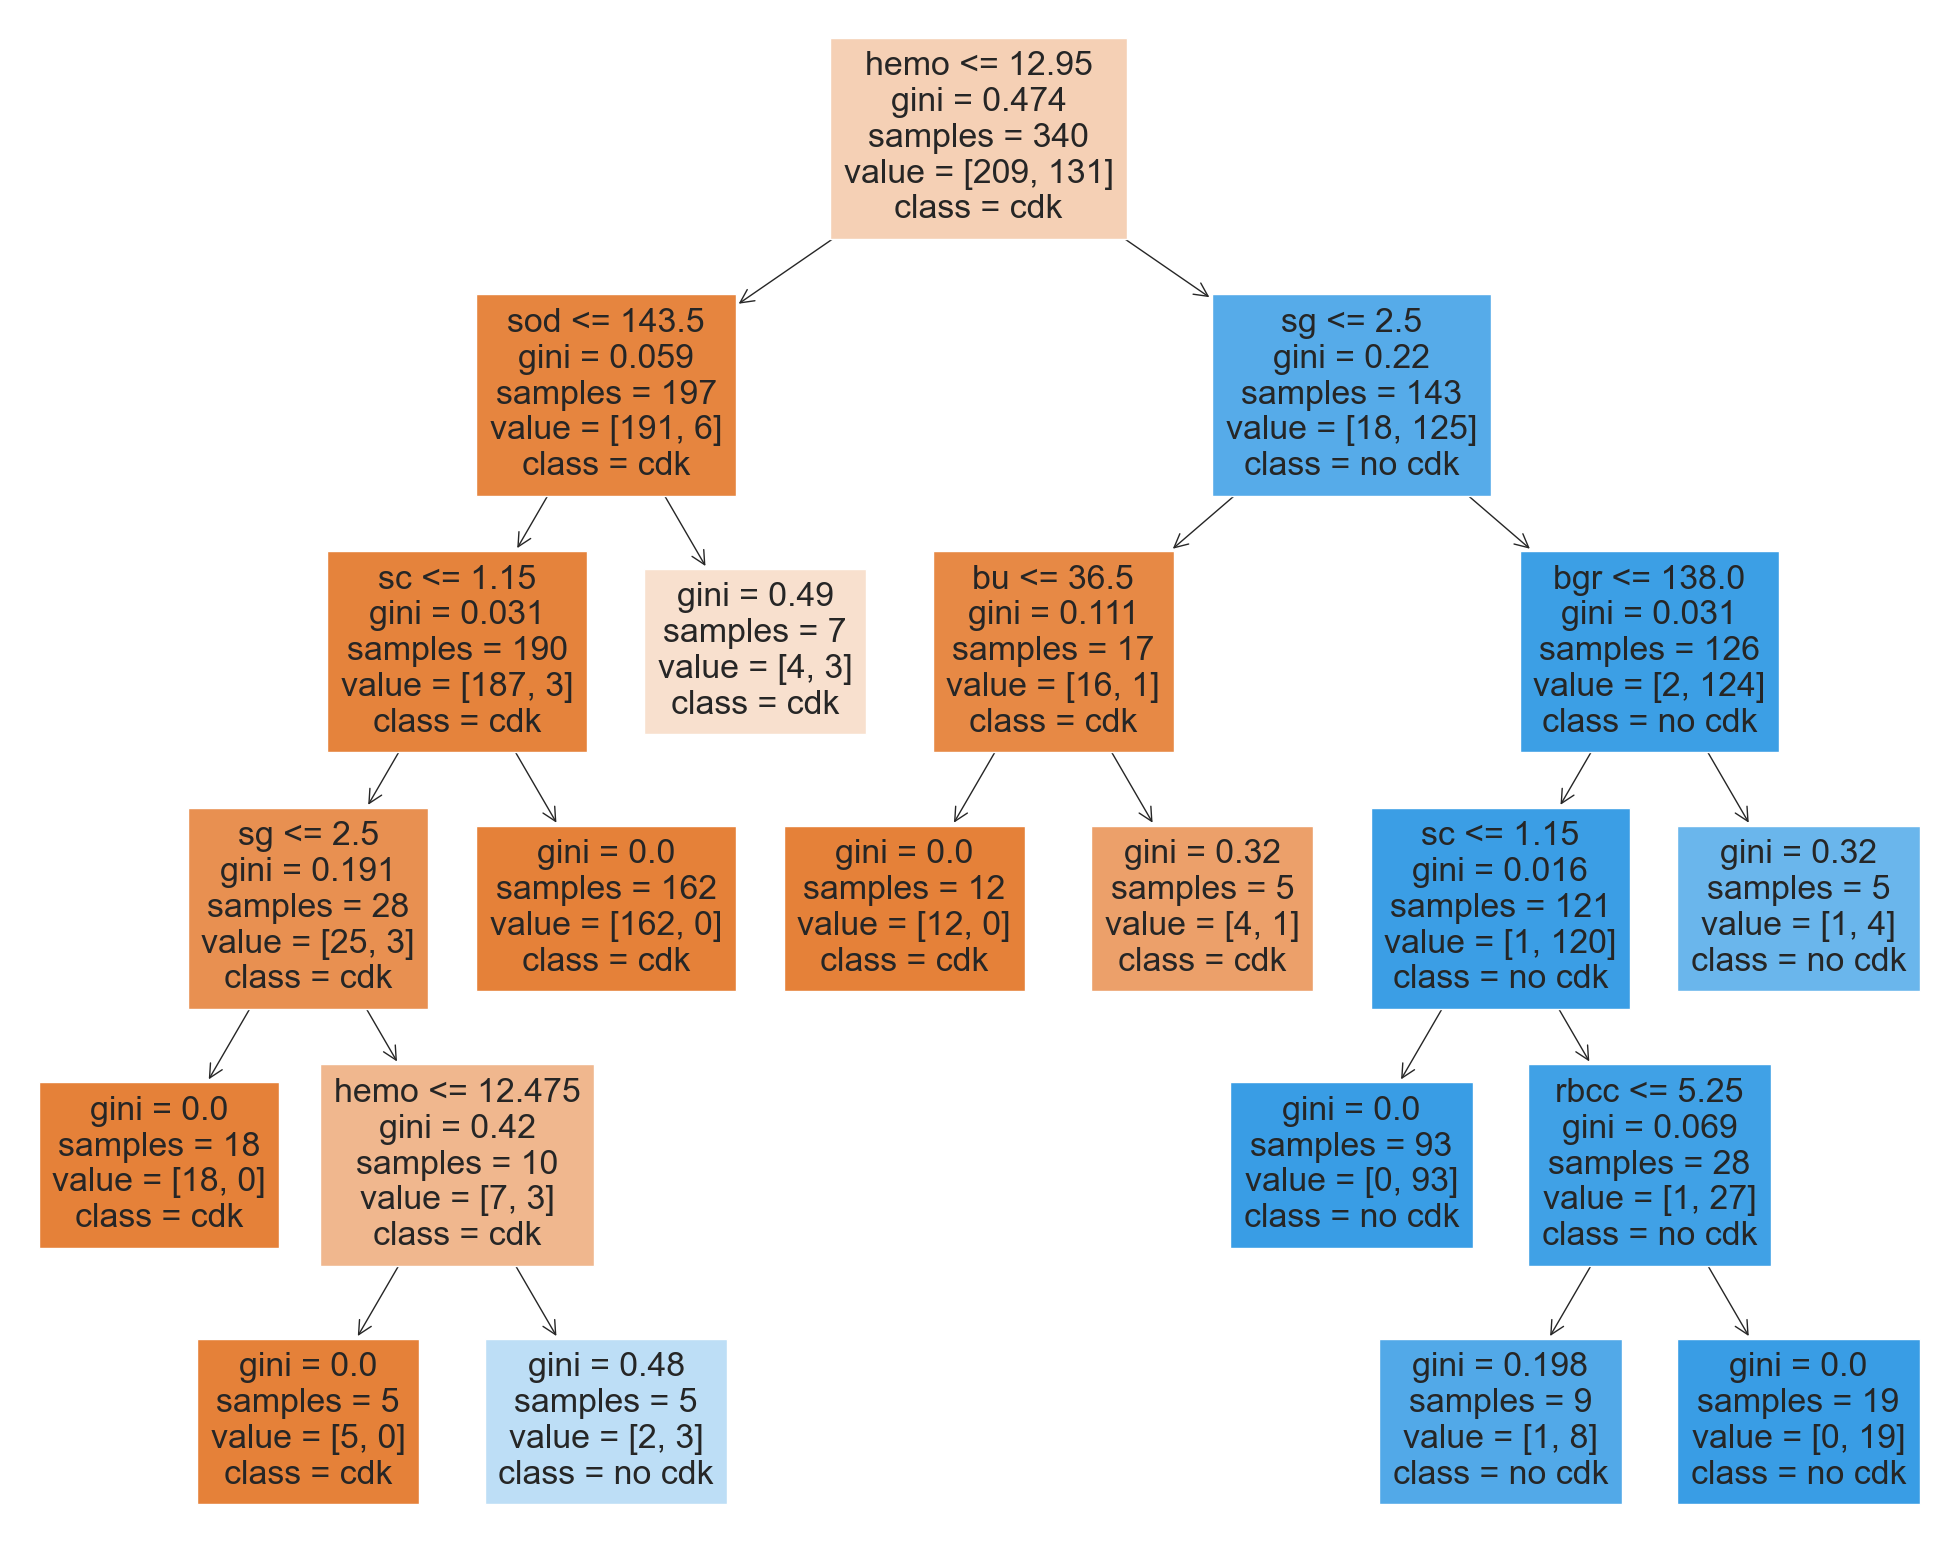

In [110]:
get_dt_graph(dt_best)

##### best estimator Report

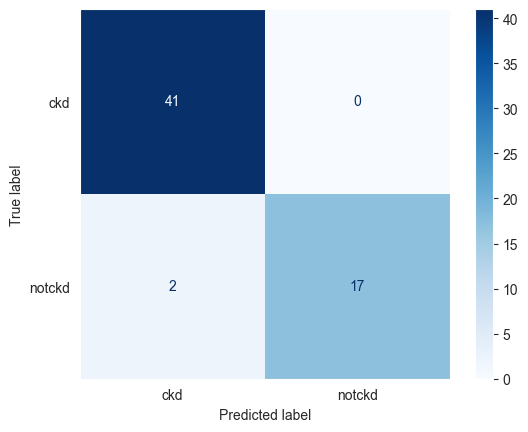

In [111]:
ConfusionMatrixDisplay.from_estimator(dt_best,X_test, y_test, display_labels=['ckd','notckd'], cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [112]:
y_pred = dt_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.89      0.94        19

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60



# Random Forest classification

###### early test and score

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9666666666666667

##### Random Forest Report

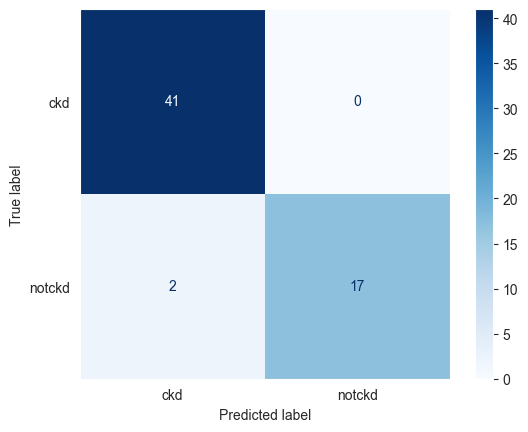

In [114]:
ConfusionMatrixDisplay.from_estimator(rfc,X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [115]:
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.89      0.94        19

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60



In [116]:
for var, imp in zip(X.columns.values, rfc.feature_importances_):
    if imp != 0:
        print(f'{var}: {imp}')

age: 0.011489898763135706
bp: 0.012854906073708918
sg: 0.09452995509502157
al: 0.0924192901956766
su: 0.008261717847679055
rbc: 0.01706963203879285
pc: 0.0032440880745787026
pcc: 0.00021223442315572926
ba: 8.553781903719637e-05
bgr: 0.027698635867796483
bu: 0.031779792558571975
sc: 0.11641027387637562
sod: 0.02665590879881869
pot: 0.006649756072800712
hemo: 0.23576655689665776
pcv: 0.1404542625711298
wbcc: 0.006716046521382239
rbcc: 0.07252434414554589
htn: 0.03241954341464667
dm: 0.045543179121681314
appet: 0.007562089182914245
pe: 0.008703154206240701
ane: 0.0009491964346515389


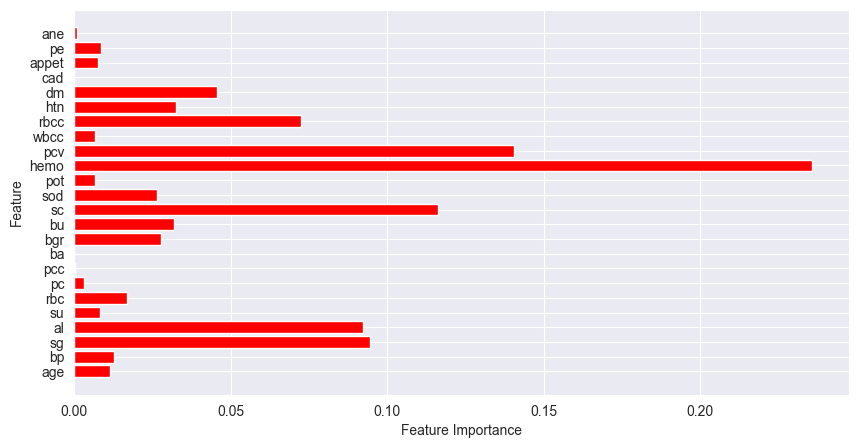

In [117]:
features_importance_plot(rfc)
plt.show()

##### Grid Search

In [118]:
rfc_params = {'bootstrap': [True, False],
          'max_depth': [10, 20, 30, 40, 50, None],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [10, 50, 100, 200]}

In [119]:
# Instantiate the grid search model
rfc_grid_search = GridSearchCV(estimator=rfc, param_grid=rfc_params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
rfc_grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(rfc_grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

Fitting 4 folds for each of 864 candidates, totalling 3456 fits


C:\Users\Khalil Dimassi\Desktop\data analysis\Machine Learning\.env\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
2,0.306749,0.024884,0.024501,0.009014,True,10,auto,1,2,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",1.0,1.0,0.976471,0.988235,0.991176,0.009755,1
3,0.516750,0.028551,0.037499,0.004716,True,10,auto,1,2,200,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",1.0,1.0,0.976471,0.988235,0.991176,0.009755,1
6,0.248001,0.007648,0.021999,0.005831,True,10,auto,1,5,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",1.0,1.0,0.976471,0.988235,0.991176,0.009755,1
38,0.228392,0.008808,0.020142,0.004306,True,10,sqrt,1,2,100,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",1.0,1.0,0.976471,0.988235,0.991176,0.009755,1
39,0.467786,0.031448,0.053523,0.030319,True,10,sqrt,1,2,200,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",1.0,1.0,0.976471,0.988235,0.991176,0.009755,1


In [120]:
rfc_best = rfc_grid_search.best_estimator_
rfc_best

RandomForestClassifier(max_depth=10, max_features='auto', random_state=0)

##### best estimator Report

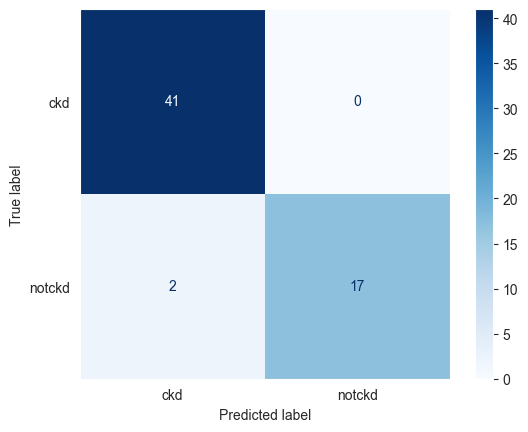

In [121]:
ConfusionMatrixDisplay.from_estimator(rfc_best, X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [122]:
y_pred = dt_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.89      0.94        19

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60



# Logistic Regression classification

###### early test and score

In [123]:
from sklearn.linear_model  import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\Khalil Dimassi\Desktop\data analysis\Machine Learning\.env\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.95

##### Logistic Regression Report

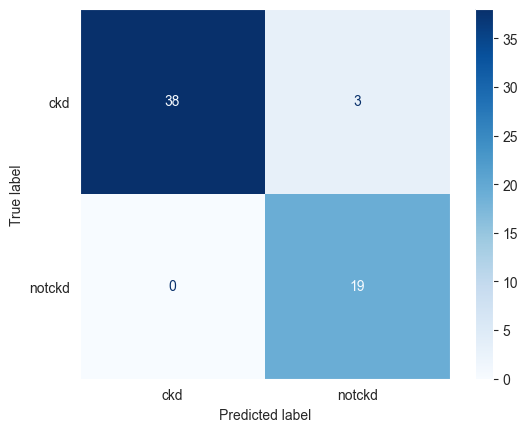

In [124]:
ConfusionMatrixDisplay.from_estimator(lr,X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [125]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.86      1.00      0.93        19

    accuracy                           0.95        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.96      0.95      0.95        60



##### Grid Search

In [130]:
lr_params = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
          'penalty': ['l2'],
          'C': [100, 10, 1.0, 0.1, 0.01]}

In [131]:
# Instantiate the grid search model
lr_grid_search = GridSearchCV(estimator=lr, param_grid=lr_params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
lr_grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(lr_grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

Fitting 4 folds for each of 15 candidates, totalling 60 fits


C:\Users\Khalil Dimassi\Desktop\data analysis\Machine Learning\.env\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.210737,0.009137,0.002999,0.000001,100,l2,newton-cg,"{'C': 100, 'penalty': 'l2', 'solver': 'newton-...",0.976471,1.000000,0.952941,1.000000,0.982353,0.019510,1
2,0.009005,0.001220,0.003246,0.000437,100,l2,liblinear,"{'C': 100, 'penalty': 'l2', 'solver': 'libline...",0.976471,0.988235,0.964706,0.988235,0.979412,0.009755,2
3,0.195500,0.016918,0.004253,0.002281,10,l2,newton-cg,"{'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}",0.976471,1.000000,0.941176,1.000000,0.979412,0.024075,2
5,0.007500,0.000865,0.002501,0.000501,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.976471,0.988235,0.964706,0.988235,0.979412,0.009755,2
6,0.167000,0.021485,0.002999,0.000005,1.0,l2,newton-cg,"{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-...",0.976471,0.988235,0.952941,1.000000,0.979412,0.017400,2


In [132]:
lr_best = lr_grid_search.best_estimator_
lr_best

LogisticRegression(C=100, random_state=0, solver='newton-cg')

##### best estimator Report

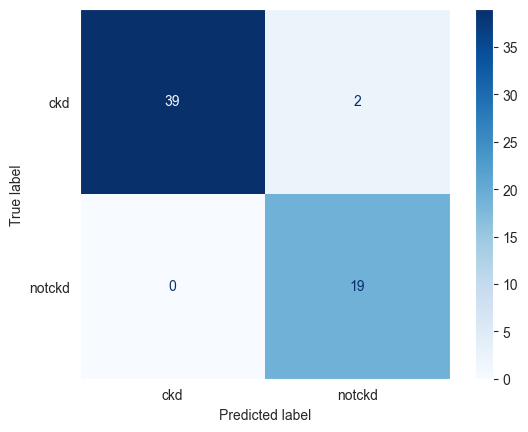

In [133]:
ConfusionMatrixDisplay.from_estimator(lr_best, X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [134]:
y_pred = lr_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        41
           1       0.90      1.00      0.95        19

    accuracy                           0.97        60
   macro avg       0.95      0.98      0.96        60
weighted avg       0.97      0.97      0.97        60



# KNN classification

###### early test and score

In [135]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=2)
kNN.fit(X_train, y_train)
kNN.score(X_test, y_test)

0.7333333333333333

##### KNN Report

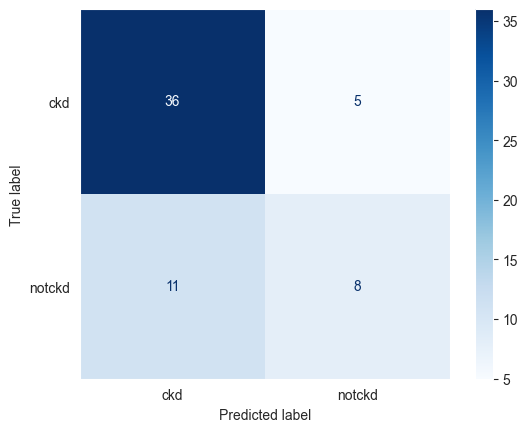

In [136]:
ConfusionMatrixDisplay.from_estimator(kNN,X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [137]:
y_pred = kNN.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        41
           1       0.62      0.42      0.50        19

    accuracy                           0.73        60
   macro avg       0.69      0.65      0.66        60
weighted avg       0.72      0.73      0.72        60



##### Grid Search

In [138]:
kNN_params = { 'n_neighbors' : [2],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [139]:
# Instantiate the grid search model
kNN_grid_search = GridSearchCV(estimator=kNN, param_grid=kNN_params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
kNN_grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(kNN_grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

Fitting 4 folds for each of 6 candidates, totalling 24 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5,0.003251,0.000431,0.004749,0.000434,manhattan,2,distance,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.800000,0.811765,0.752941,0.741176,0.776471,0.029994,1
1,0.004749,0.001299,0.228137,0.003691,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.776471,0.752941,0.741176,0.741176,0.752941,0.014409,2
3,0.003745,0.000430,0.003998,0.000003,euclidean,2,distance,"{'metric': 'euclidean', 'n_neighbors': 2, 'wei...",0.776471,0.752941,0.741176,0.741176,0.752941,0.014409,2
4,0.004249,0.000828,0.007999,0.000001,manhattan,2,uniform,"{'metric': 'manhattan', 'n_neighbors': 2, 'wei...",0.776471,0.741176,0.741176,0.717647,0.744118,0.021004,4
0,0.004000,0.000005,0.202115,0.016506,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.776471,0.741176,0.705882,0.741176,0.741176,0.024957,5


In [140]:
kNN_best = kNN_grid_search.best_estimator_
kNN_best

KNeighborsClassifier(metric='manhattan', n_neighbors=2, weights='distance')

##### best estimator Report

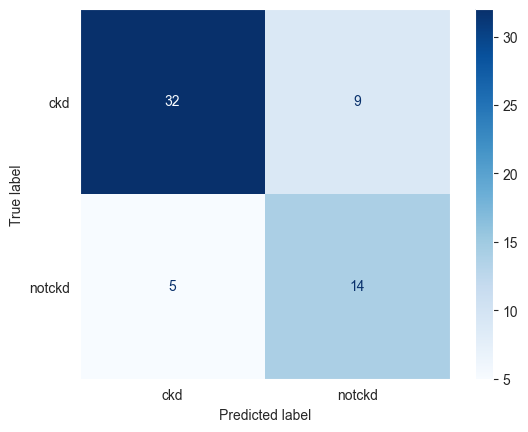

In [141]:
ConfusionMatrixDisplay.from_estimator(kNN_best, X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [142]:
y_pred = kNN_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.61      0.74      0.67        19

    accuracy                           0.77        60
   macro avg       0.74      0.76      0.74        60
weighted avg       0.78      0.77      0.77        60



# SVM classification

###### early test and score

In [143]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6833333333333333

##### SVM Report

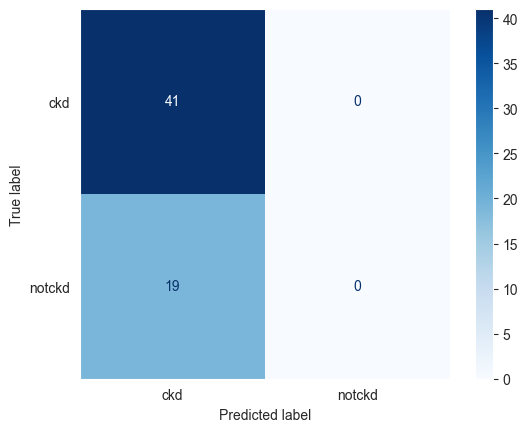

In [144]:
ConfusionMatrixDisplay.from_estimator(svc,X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [145]:
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        41
           1       0.00      0.00      0.00        19

    accuracy                           0.68        60
   macro avg       0.34      0.50      0.41        60
weighted avg       0.47      0.68      0.55        60



C:\Users\Khalil Dimassi\Desktop\data analysis\Machine Learning\.env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Khalil Dimassi\Desktop\data analysis\Machine Learning\.env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Khalil Dimassi\Desktop\data analysis\Machine Learning\.env\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

##### Grid Search

In [146]:
svc_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [147]:
# Instantiate the grid search model
svc_grid_search = GridSearchCV(svc, svc_params, refit = True, verbose = 3)
svc_grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(svc_grid_search.cv_results_)
score_df.nlargest(5,"mean_test_score")

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.603 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.603 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.618 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,0.008602,0.000491,0.003804,0.000389,100,0.0001,rbf,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}",0.897059,0.794118,0.897059,0.808824,0.808824,0.841176,0.045943,1
14,0.008209,0.000734,0.003399,0.000492,10,0.0001,rbf,"{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}",0.926471,0.779412,0.852941,0.794118,0.808824,0.832353,0.053104,2
24,0.008597,0.000496,0.003598,0.000490,1000,0.0001,rbf,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}",0.882353,0.764706,0.867647,0.794118,0.779412,0.817647,0.047969,3
9,0.006600,0.000801,0.003600,0.000490,1,0.0001,rbf,"{'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}",0.897059,0.661765,0.823529,0.764706,0.794118,0.788235,0.077034,4
13,0.010575,0.000828,0.005009,0.000876,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.764706,0.823529,0.764706,0.750000,0.808824,0.782353,0.028516,5


In [148]:
svc_best = svc_grid_search.best_estimator_
svc_best

SVC(C=100, gamma=0.0001)

##### best estimator Report

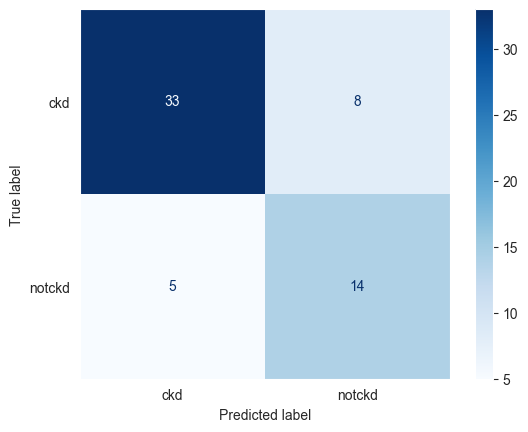

In [149]:
ConfusionMatrixDisplay.from_estimator(svc_best, X_test, y_test, display_labels=['ckd','notckd'],cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

In [150]:
y_pred = svc_best.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        41
           1       0.64      0.74      0.68        19

    accuracy                           0.78        60
   macro avg       0.75      0.77      0.76        60
weighted avg       0.79      0.78      0.79        60



# ROC & AUC CURVE

Legend


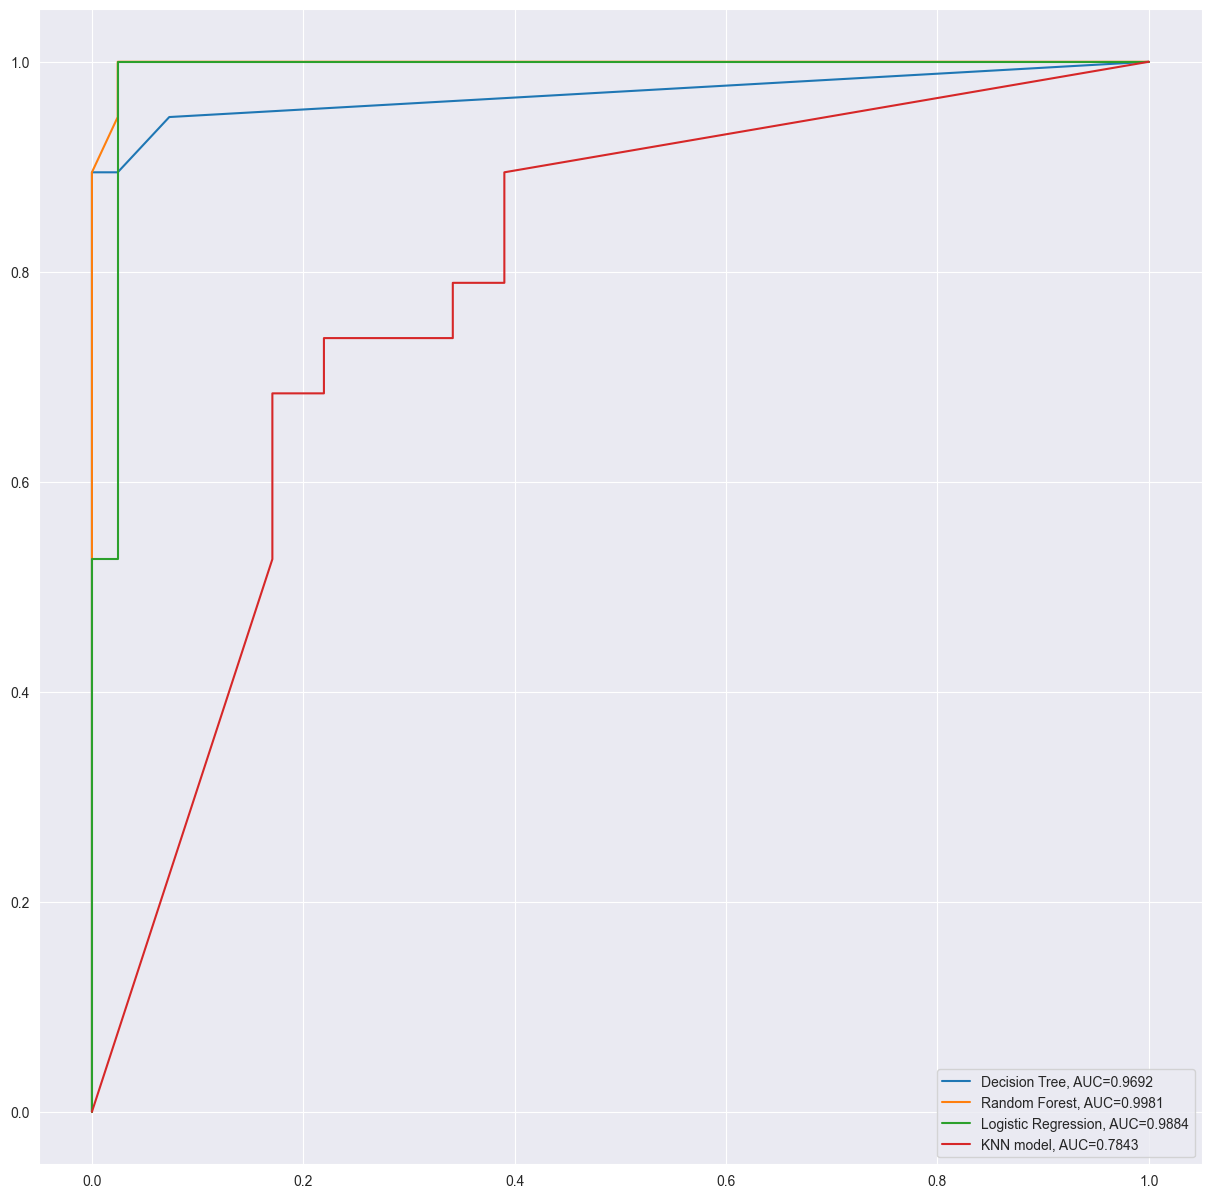

In [159]:
from sklearn import metrics

#set up plotting area
plt.figure(figsize=(15, 15)).clf()

#fit Decision Tree model and plot ROC curve
y_pred = dt_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Decision Tree, AUC="+str(auc))

#fit Random Forest model and plot ROC curve
y_pred = rfc_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

#fit Logistic Regression model and plot ROC curve
y_pred = lr_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit KNN model and plot ROC curve
y_pred = kNN_best.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="KNN model, AUC="+str(auc))

#fit SVM model and plot ROC curve
# y_pred = svc_best.predict_proba(X_test)[:, 1]
# fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
# plt.plot(fpr,tpr,label="SVM model, AUC="+str(auc))

#add legend
print(plt.legend())